## Loss comparison for models with increasing number of convolutional layers

K562 - MSE loss models. Num of layers increased from 1 to 4 

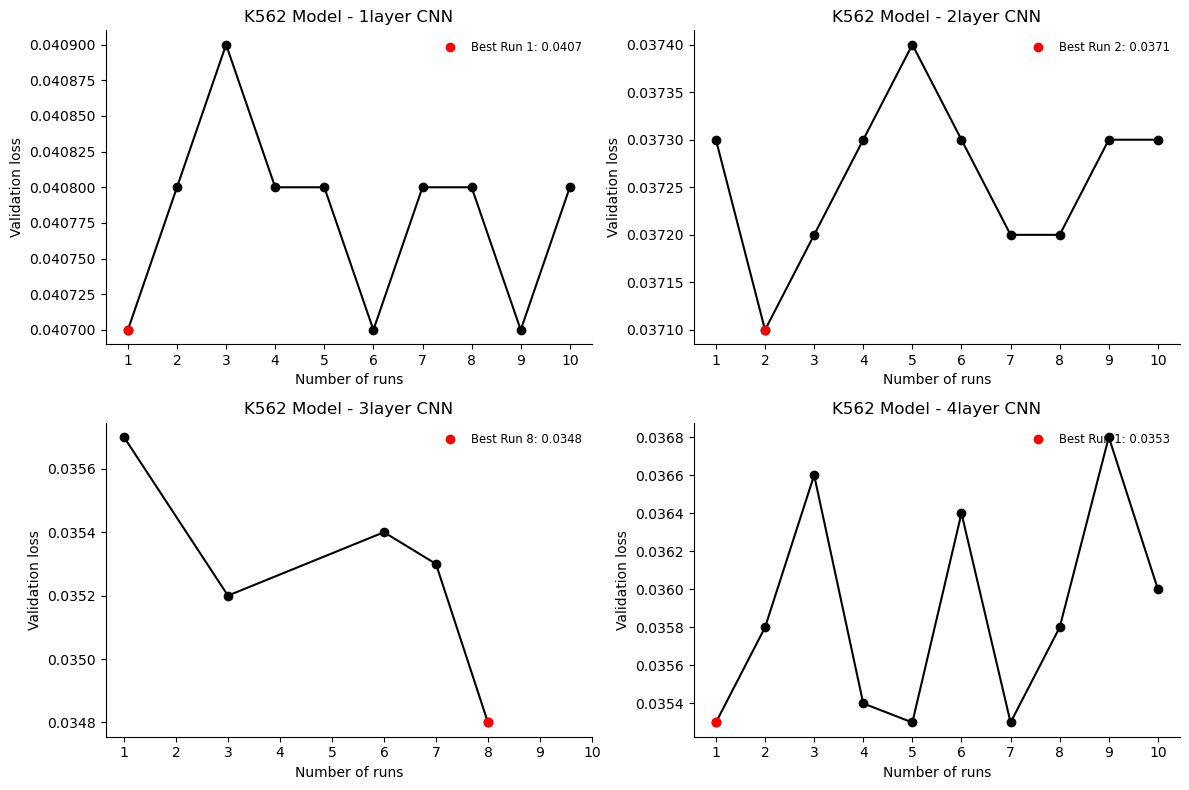

In [1]:
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
log_dir = "/hpc/group/igvf/revathy/models/logs/increasing/"
datasets = ["1layer", "2layer", "3layer", "4layer"]
model_prefix = "K562"
runs = range(1, 11)

# Set up subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

# Loop through datasets
for idx, dataset in enumerate(datasets):
    run_min_mse = {}

    for run in runs:
        filename = f"{model_prefix}_{dataset}_{run}.out"
        filepath = os.path.join(log_dir, filename)
        
        with open(filepath, 'r') as f:
            mses = []
            for line in f:
                if "Min validation loss:" in line:
                    mse_match = re.search(r"Min validation loss: \s*([0-9eE\+\.-]+)", line)
                    if mse_match:
                        mses.append(float(mse_match.group(1)))


            if mses:
                run_min_mse[run] = min(mses)
    

    # Prepare data
    x_vals = []
    y_vals = []
    for run in runs:
        mse = run_min_mse.get(run)
        if mse is not None:
            x_vals.append(run)
            y_vals.append(mse)

    # Plot
    ax = axs[idx]
    ax.plot(x_vals, y_vals, marker='o', color='black')

    # Identify run with overall min MSE
    if y_vals:
        min_index = y_vals.index(min(y_vals))
        best_run = x_vals[min_index]
        best_mse = y_vals[min_index]
        ax.plot(best_run, best_mse, 'o', color='red', label=f"Best Run {best_run}: {best_mse:.4f}")
        ax.legend(fontsize='small', loc='upper right', frameon=False)

    ax.set_title(f"K562 Model - {dataset} CNN")
    ax.set_xlabel("Number of runs")
    ax.set_ylabel("Validation loss")
    ax.set_xticks(runs)
    # ax.grid(True)

sns.despine()
plt.tight_layout()
plt.show()
